In [2]:
# Importing Libraries

# Data Manipulation & Analysis
import numpy as np
import os
from PIL import Image

# Data Visulization
import matplotlib.pyplot as plt
import matplotlib.image as img

# Machine Learning Models & Utilities
import keras
from sklearn.model_selection import train_test_split
# Saving trained Model
from joblib import dump

# Handling Unnecessary Warnings
import warnings
warnings.filterwarnings('ignore')

In [8]:
lookup = dict()
reverselookup = dict()
count = 0
path =  r"C:\Users\Khushi\OneDrive\Desktop\task4\leapGestRecog\00"
for j in os.listdir(path):
    if not j.startswith('.'): #to insure safe local running, without accessing hidden files
        lookup[j] = count
        reverselookup[count] = j
        count = count + 1
lookup

{'01_palm': 0,
 '02_l': 1,
 '03_fist': 2,
 '04_fist_moved': 3,
 '05_thumb': 4,
 '06_index': 5,
 '07_ok': 6,
 '08_palm_moved': 7,
 '09_c': 8,
 '10_down': 9}

In [11]:
x_data = []
y_data = []
datacount = 0 # We'll use this to tally how many images are in our dataset
path = r"C:\Users\Khushi\OneDrive\Desktop\task4\leapGestRecog\0"

In [12]:
for i in range(0, 10): # Loop over the ten top-level folders
    for j in os.listdir(path + str(i) + '/'):
        if not j.startswith('.'): # Again avoid hidden folders
            count = 0 # To tally images of a given gesture
            for k in os.listdir(path +
                                str(i) + '/' + j + '/'):
                                # Loop over the images
                img = Image.open(path +
                                str(i) + '/' + j + '/' + k).convert('L')
                                # Read in and convert to greyscale
                img = img.resize((320, 120))
                arr = np.array(img)
                x_data.append(arr)
                count = count + 1
            y_values = np.full((count, 1), lookup[j])
            y_data.append(y_values)
            datacount = datacount + count

datacount



20000

In [13]:
x_data = np.array(x_data, dtype = 'float32')
y_data = np.array(y_data)
y_data = y_data.reshape(datacount, 1)

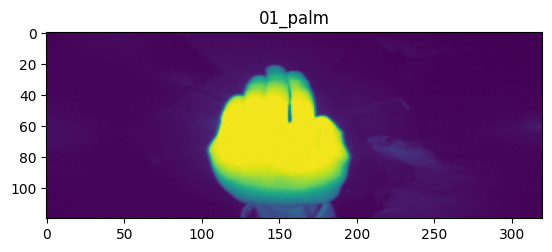

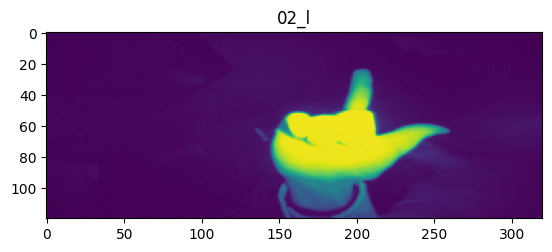

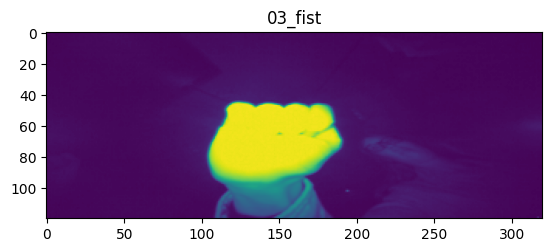

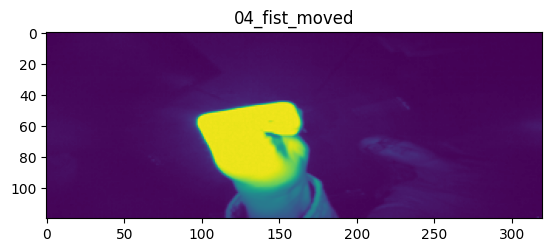

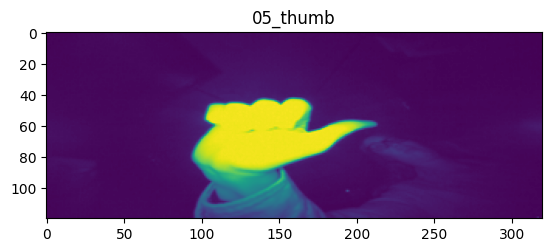

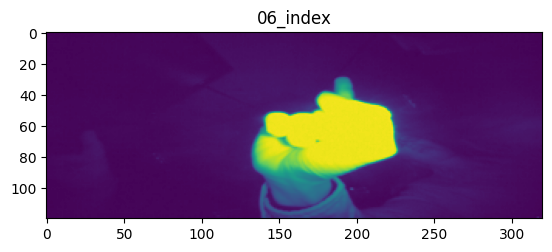

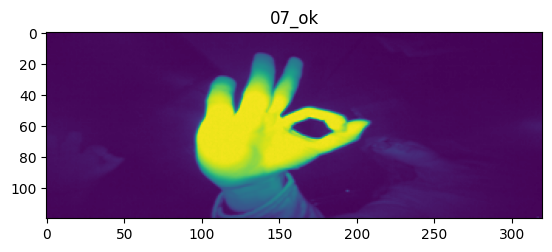

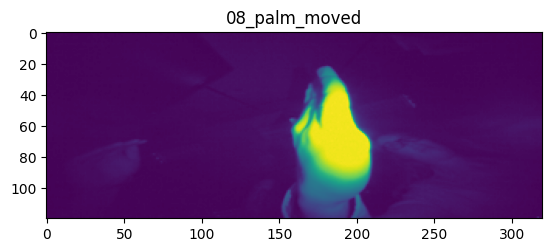

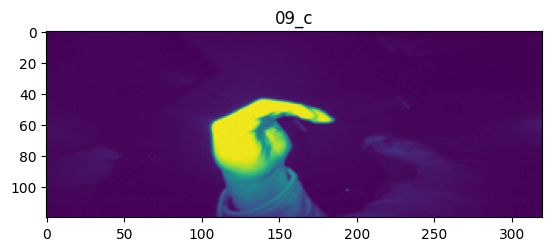

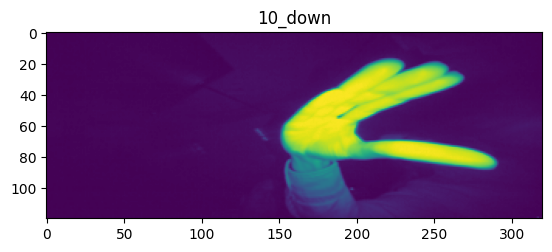

In [14]:
from random import randint
import matplotlib.pyplot as plt

# Loop through each gesture group
for i in range(10):  # Assuming there are 10 gestures (0-9)
    start_index = i * 200  # Starting index for the gesture group
    end_index = start_index + 200  # Ending index for the gesture group
    random_index = randint(start_index, end_index - 1)  # Select a random index within the group
    
    plt.imshow(x_data[random_index, :, :])  # Display the randomly selected image
    plt.title(reverselookup[y_data[random_index, 0]])  # Use the corresponding label for the title
    plt.show()

In [15]:
from keras.utils import to_categorical
y_data = to_categorical(y_data)

In [16]:
x_data = x_data.reshape((datacount, 120, 320, 1))
x_data /= 255

In [40]:
x_train,x_further,y_train,y_further = train_test_split(x_data,y_data,test_size = 0.2)
x_validate,x_test,y_validate,y_test = train_test_split(x_further,y_further,test_size = 0.5)

In [18]:
from keras import layers
from keras import models

In [19]:
model=models.Sequential()
model.add(layers.Conv2D(32, (5, 5), strides=(2, 2), activation='relu', input_shape=(120, 320,1))) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [34]:
model.compile(optimizer='rmsprop',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

In [44]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data Generator with Resizing and Normalization
datagen = ImageDataGenerator(
    rescale=1./255
)

train_generator = datagen.flow(
    x_train,
    y_train,
    batch_size=32  # Adjust batch size based on memory capacity
)

validate_generator = datagen.flow(
    x_validate,
    y_validate,
    batch_size=32
)

# Fit the model using the generator
model.fit(
    train_generator,
    validation_data=validate_generator,
    epochs=5
)


Epoch 1/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 69s 138ms/step - accuracy: 0.0964 - loss: 2.3025 - val_accuracy: 0.0950 - val_loss: 2.3027
Epoch 2/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 70s 141ms/step - accuracy: 0.1031 - loss: 2.3026 - val_accuracy: 0.0950 - val_loss: 2.3028
Epoch 3/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 66s 133ms/step - accuracy: 0.0976 - loss: 2.3027 - val_accuracy: 0.0945 - val_loss: 2.3028
Epoch 4/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 69s 137ms/step - accuracy: 0.0985 - loss: 2.3028 - val_accuracy: 0.0945 - val_loss: 2.3028
Epoch 5/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 74s 147ms/step - accuracy: 0.1028 - loss: 2.3025 - val_accuracy: 0.1070 - val_loss: 2.3027


In [45]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 58, 158, 32)    │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 29, 79, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 27, 77, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 38, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 11, 36, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 5, 18, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 5760)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       737,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,589,910 (6.07 MB)

 Trainable params: 794,954 (3.03 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 794,956 (3.03 MB)

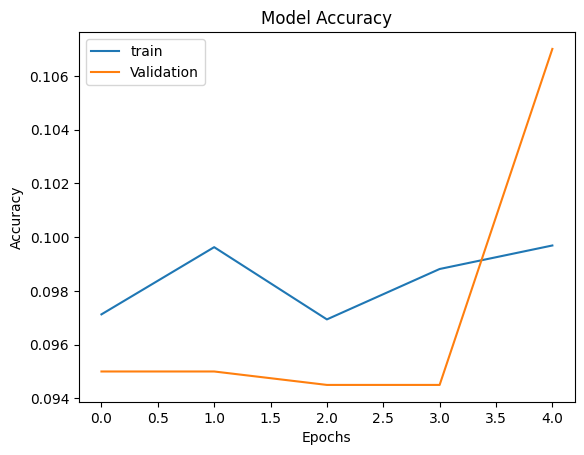

In [46]:
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'Validation'])
plt.show()

In [47]:
[loss, acc] = model.evaluate(x_test,y_test,verbose=1)
print("Accuracy:" + str(acc))

63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.9935 - loss: 0.0173
Accuracy:0.9965000152587891


In [48]:
## Saving Model using Joblib
import joblib
joblib.dump(model, 'model_filename.pkl')

['model_filename.pkl']

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


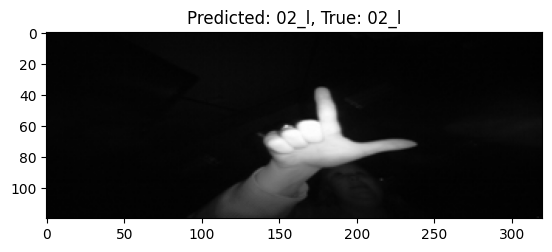

In [49]:
import random
import joblib
import numpy as np
import matplotlib.pyplot as plt

# Load an image randomly from the dataset
random_index = random.randint(0, len(x_data) - 1)  
random_image = x_data[random_index]  # Get the image directly
true_label = y_data[random_index] # Get the corresponding label

# Load the model
loaded_model = joblib.load('model_filename.pkl')

# Reshape the image for prediction, adding a batch dimension
random_image_reshaped = random_image.reshape((1, 120, 320, 1))

# Predict using the loaded model
prediction = loaded_model.predict(random_image_reshaped)
predicted_label_index = np.argmax(prediction)
predicted_label = reverselookup[predicted_label_index]

# Convert true_label to human-readable format
true_label_index = np.argmax(true_label)  # Find the index of the maximum value (which is 1 in one-hot encoding)
true_label_name = reverselookup[true_label_index]  # Use the index to look up the gesture name

# Plot the image with the prediction
plt.imshow(random_image, cmap='gray')  # Adjust cmap if it's RGB
plt.title(f"Predicted: {predicted_label}, True: {true_label_name}")
plt.show()